In [56]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# **Задание 1**: Загрузите файл HR.csv в pandas dataframe

In [57]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# **Задание 2**: Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [58]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [59]:
print('Мода satisfaction_level: ', df['satisfaction_level'].mode()[0])
print('Мода last_evaluation: ', df['last_evaluation'].mode()[0])
print('Мода number_project: ', df['number_project'].mode()[0])
print('Мода average_montly_hours: ', df['average_montly_hours'].mode()[0])
print('Мода time_spend_company: ', df['time_spend_company'].mode()[0])
print('Мода Work_accident: ', df['Work_accident'].mode()[0])
print('Мода left: ', df['left'].mode()[0])
print('Мода promotion_last_5years: ', df['promotion_last_5years'].mode()[0])

Мода satisfaction_level:  0.1
Мода last_evaluation:  0.55
Мода number_project:  4
Мода average_montly_hours:  135
Мода time_spend_company:  3
Мода Work_accident:  0
Мода left:  0
Мода promotion_last_5years:  0


Большинство основных статистик можно расчитать используя метод describe (Медиана равна второму квантилю). Мода рассчитана отдельно.



# **Задание 3**: Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


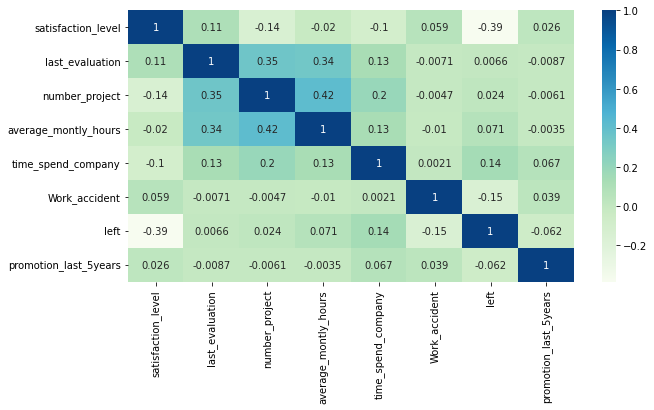

In [60]:
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c, cmap='GnBu', annot=True)
c

Наиболее скоррелированы показатели среднего кол-ва часов на рабочем месте в месяц и количество проектов.
Наименее скоррелированы показатели уровня удовлетворенности работой и уволился ли сотрудник.

# **Задание 4**: Рассчитайте сколько сотрудников работает в каждом департаменте.


In [61]:
current_employees = df.loc[df['left'] == 0]

In [62]:
qty = pd.pivot_table(current_employees,
               index=['department'],
               aggfunc={'salary': len})
qty.rename(columns={'salary' : 'qty employees'})


,qty employees
department,
IT,954
RandD,666
accounting,563
hr,524
management,539
marketing,655
product_mng,704
sales,3126
support,1674


# **Задание 5**: Показать распределение сотрудников по зарплатам. 

In [63]:
salary = pd.pivot_table(current_employees,
               index=['salary'],
               aggfunc={'salary': len})
salary.rename(columns={'salary' : 'qty employees'})
salary['share'] = salary.salary / len(current_employees)
salary.head()

,salary,share
salary,,
high,1155,0.101068
low,5144,0.450123
medium,5129,0.448810


# **Задание 6**: Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности


In [64]:
dep = pd.pivot_table(current_employees,
               index=['department'],
               columns=['salary'],
               aggfunc={'salary': len})
dep.rename(columns={'salary' : 'qty employees'})

qty employees             
salary               high   low medium
department                            
IT                     79   437    438
RandD                  47   309    310
accounting             69   259    235
hr                     39   243    242
management            224   121    194
marketing              71   276    308
product_mng            62   346    296
sales                 255  1402   1469
support               133   757    784
technical             176   994    853

# **Задание 7**: Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом


H0: сотрудники с высоким окладом проводят на роботе меньше времени, чем сотрудники с низним окладом

H1: сотрудники с высоким окладом проводят на роботе больше времени, чем сотрудники с низним окладом

In [65]:
alpha = 0.05

result = st.ttest_ind(df[df['salary'] == 'high']['average_montly_hours'], df[df['salary'] == 'low']['average_montly_hours'], equal_var=False)
print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, критикам больше нравятся игры на PC, чем на PS4')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу


# **Задание 8**: Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности): 

*   Доля сотрудников с повышением за последние 5 лет
*   Средняя степень удовлетворенности
*   Среднее количество проектов

In [66]:
promotion = df.loc[df['promotion_last_5years'] == 1]

In [67]:
result = pd.pivot_table(promotion, index=['left'], aggfunc={'salary': len}).merge(pd.pivot_table(df, index=['left'], aggfunc={'salary': len}), how='left', left_on='left', right_on='left')
result['share'] = r['salary_x'] / r['salary_y']
result.drop(columns=['salary_x', 'salary_y'])
result['share'].map(lambda n: '{:,.2%}'.format(n))

left
0    2.63%
1    0.53%
Name: share, dtype: object

In [68]:
df.groupby(['left'])['satisfaction_level'].mean().reset_index()

,left,satisfaction_level
0,0,0.666810
1,1,0.440098


In [69]:
df.groupby(['left'])['number_project'].mean().reset_index()

,left,number_project
0,0,3.786664
1,1,3.855503


# **Задание 9**: Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [70]:
d = df['left'].to_numpy()

In [71]:
df.drop(['salary', 'department','left'], axis=1, inplace=True)

In [72]:
from sklearn.model_selection import train_test_split 
 
X_train, X_test, y_train, y_test = train_test_split(df, d, test_size=0.30, random_state=42) 

In [73]:
from sklearn.preprocessing import StandardScaler 
 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
 
lda = LDA(n_components=1) 
X_train = lda.fit_transform(X_train, y_train) 
X_test = lda.transform(X_test) 

In [75]:
from sklearn.ensemble import RandomForestClassifier 

classifier = RandomForestClassifier(max_depth=2, random_state=0) 
 
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 

In [76]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
 
print('Accuracy: ' + str(accuracy_score(y_test, y_pred))) 
confusion_matrix(y_test, y_pred) 

Accuracy: 0.8382222222222222


array([[3099,  329],
       [ 399,  673]])